# Logistic Regression Example - Predict the Success of Bank Telemarketing

Predict whether the client will subscribe a term deposit? This is a binary classification problem. The response variable, `y`, indicates if the client subscribed a term deposit and we'd like to predict it based on the historical data.

Data source:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. [A Data-Driven Approach to Predict the Success of Bank Telemarketing](http://media.salford-systems.com/video/tutorial/2015/targeted_marketing.pdf). Decision Support Systems, Elsevier, 62:22-31, June 2014

### Input variables
**Bank client data:**
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

**Related with the last contact of the current campaign:**

8. contact: contact communication type (categorical: 'cellular','telephone') 
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Social and economic context attributes**

16. emp_var_rate: employment variation rate - quarterly indicator (numeric)
17. cons_price_idx: consumer price index - monthly indicator (numeric) 
18. cons_conf_idx: consumer confidence index - monthly indicator (numeric) 
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr_employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target)
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

Importing libraries:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# the following line gets the bucket name attached to our cluster
bucket = spark._jsc.hadoopConfiguration().get("fs.gs.system.bucket")

# specifying the path to our bucket where the data is located (no need to edit this path anymore)
data = "gs://" + bucket + "/notebooks/data/"
print(data)

gs://is843/notebooks/data/


Importing data:

In [2]:
df = spark.read.format("csv")\
  .option("header", "true")\
  .option("inferSchema", "true")\
  .load(data + "bank-additional-full.csv")\
  .coalesce(5)

df.cache()
df.show(5)
df.printSchema()
print("This datasets consists of {} rows.".format(df.count()))

+---+---------+-------+-----------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|      job|marital|  education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+---------+-------+-----------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 56|housemaid|married|   basic.4y|     no|     no|  no|telephone|  may|        mon|     261|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
| 57| services|married|high.school|unknown|     no|  no|telephone|  may|        mon|     149|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
| 37| serv

Define an RFormula that uses all of the 20 columns as features and call it `supervised`:

In [3]:
# Your answer goes here


Fit the RFormula transformer and call it `fittedRF`:

In [4]:
# Your answer goes here


Using `fittedRF` transform our `df` DataFrame. Call this `preparedDF`:

In [5]:
# Your answer goes here


Print the first couple of rows of `preparedDF`, with the truncate option off:

In [6]:
# Your answer goes here


+---------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|features                                                                                                                                           |label|
+---------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|(53,[0,9,12,19,22,25,26,29,39,42,43,44,46,48,49,50,51,52],[56.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,261.0,1.0,999.0,1.0,1.1,93.994,-36.4,4.857,5191.0])|0.0  |
|(53,[0,4,12,16,23,25,26,29,39,42,43,44,46,48,49,50,51,52],[57.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,149.0,1.0,999.0,1.0,1.1,93.994,-36.4,4.857,5191.0])|0.0  |
+---------------------------------------------------------------------------------------------------------------------------------------------------+-----+
only showing top 2 rows



Below we will retrieve the name of the columns used to make our feature vector and store them in a pandas DataFrame:

In [7]:
featureCols = pd.DataFrame(preparedDF.schema["features"].metadata["ml_attr"]["attrs"]["binary"]+
  preparedDF.schema["features"].metadata["ml_attr"]["attrs"]["numeric"]).sort_values("idx")

featureCols = featureCols.set_index('idx')
featureCols.head()

,name
idx,
0,age
1,job_admin.
2,job_blue-collar
3,job_technician
4,job_services


Split the transformed data into `train` and `test`. Use a 30% split and a `seed`.

In [8]:
# Your answer goes here


+---+-------+-------+---------+-------+-------+----+--------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+--------------------+-----+
|age|    job|marital|education|default|housing|loan| contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|            features|label|
+---+-------+-------+---------+-------+-------+----+--------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+--------------------+-----+
| 17|student| single| basic.9y|     no|    yes|  no|cellular|  aug|        fri|     182|       2|  999|       2| failure|        -2.9|        92.201|        -31.4|    0.869|     5076.2| no|(53,[0,11,13,17,2...|  0.0|
+---+-------+-------+---------+-------+-------+----+--------+-----+-----------+--------+--------+-----+--------+--------+-----------

Instantiate an instance of `LogisticRegression`. Call it `lr`:

In [9]:
# Your answer goes here


Print the parameters of `lr` to check the default values used. You can always come back to the cell above and change the default values:

In [10]:
# Your answer goes here


aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
family: The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial (default: auto)
featuresCol: features column name. (default: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label)
lowerBoundsOnCoefficients: The lower bounds on coefficients if fitting under bound constrained optimization. The bound matrix must be compatible with the shape (1, number of features) for binomial regression, or (number of classes, number of features) for multinomial regression. (undefined)
lowerBoundsOnIntercepts: The lower bounds on intercepts if fitting under bound constrained optimization. The bounds vector size must beequal wi

Fit the model on `train` and call it `lrModel`:

In [11]:
# Your answer goes here


Below we plot the coefficients of our model in a sorted fashion:

In [12]:
plt.rcParams["figure.figsize"] = (8,6)

Text(0, 0.5, 'Beta Coefficients')

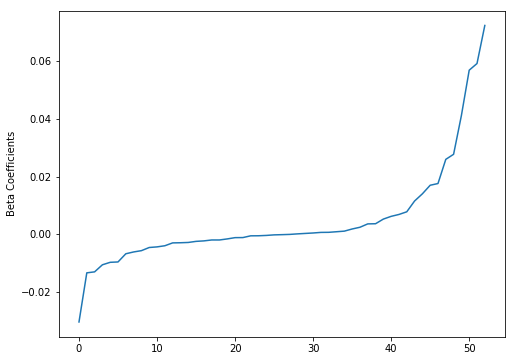

In [13]:
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')

### Feature importance

We already retrieved the name of the features. Let's join it with the coefficients to identify the ones with bigger absolute value:

In [14]:
coefsArray = np.array(lrModel.coefficients)  # convert to np.array
coefsDF = pd.DataFrame(coefsArray, columns=['coefs'])  # to pandas

coefsDF = coefsDF.merge(featureCols, left_index=True, right_index=True)  # join it with featureCols we created above
coefsDF.sort_values('coefs', inplace=True)  # Sort them
coefsDF.head()

,coefs,name
46,-0.030516,poutcome_nonexistent
23,-0.013447,default_unknown
29,-0.013108,month_may
48,-0.010651,emp_var_rate
51,-0.009790,euribor3m


Plot a bar chart:

In [15]:
plt.rcParams["figure.figsize"] = (20,3)

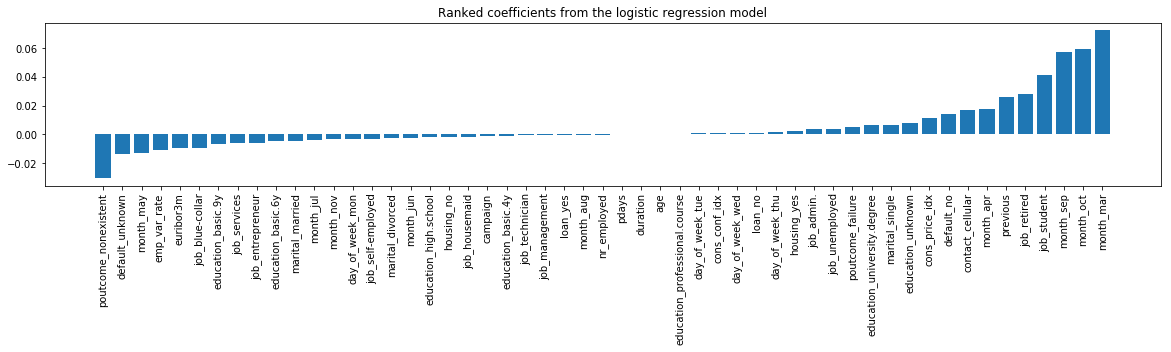

In [16]:
plt.xticks(rotation=90)
plt.bar(coefsDF.name, coefsDF.coefs)
plt.title('Ranked coefficients from the logistic regression model')
plt.show()

From our fitted model, `lrModel`, extract the summary and call it `summary`:

In [17]:
# Your answer goes here


From `summary` extract `areaUnderROC`. Note that this AUC is from the `train` dataset and we should pay more attention to the AUC coming from the `test` set:

In [18]:
# Your answer goes here


Train AUC: 0.8705946530277403


From `summary` extract `roc` and convert it to a pandas DataFrame. Call it `roc`:

In [19]:
# Your answer goes here


,FPR,TPR
0,0.000000,0.000000
1,0.002859,0.066233
2,0.006150,0.129062
3,0.010497,0.183535
4,0.015668,0.231507


Visualize the `roc` DataFrame:

In [20]:
plt.rcParams["figure.figsize"] = (8,6)

Train AUC: 0.8705946530277403


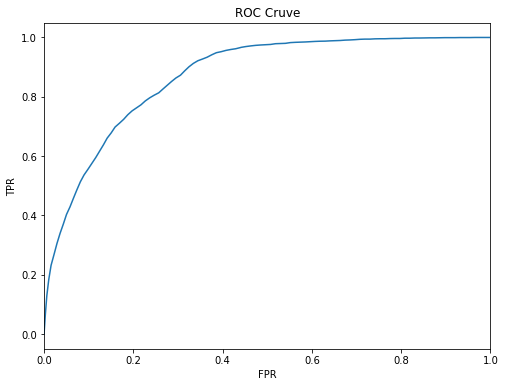

In [21]:
# Your answer goes here


Do the same with `pr` from `summary`:

Text(0, 0.5, 'precision')

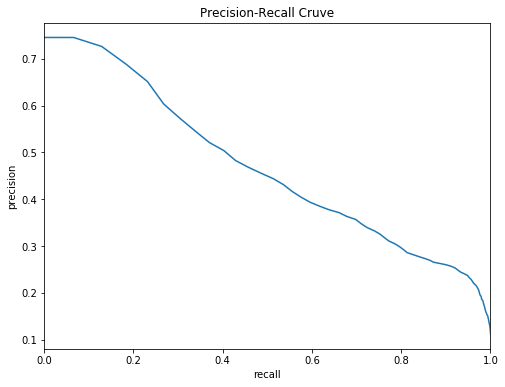

In [22]:
# Your answer goes here


Our baseline model looks promising. Let's do some predictions on the `test` set.

Pass the `test` set through our trained model. Called the resulting DataFrame `fittedTest`:

In [23]:
# Your answer goes here


Print the first few rows of this DataFrame. Only show the following columns: "label", "prediction", "rawPrediction"

In [24]:
# Your answer goes here


+-----+----------+----------------------------------------+
|label|prediction|rawPrediction                           |
+-----+----------+----------------------------------------+
|0.0  |0.0       |[1.8836989606479455,-1.8836989606479455]|
|0.0  |0.0       |[1.9763696199544867,-1.9763696199544867]|
|0.0  |0.0       |[1.8154307845264468,-1.8154307845264468]|
|0.0  |0.0       |[1.9795148124286523,-1.9795148124286523]|
|0.0  |0.0       |[1.833653306678821,-1.833653306678821]  |
+-----+----------+----------------------------------------+
only showing top 5 rows



Make an evaluator from `BinaryClassificationEvaluator` function that calculates AUC. We will use this function to measure our model's performance on the `test` set. Call this evaluator `aucEvaluator`. 

Note that this function can be found under the `pyspark.ml.evaluation` module.

In [25]:
# Your answer goes here


Using our `aucEvaluator` find out the AUC on the `test` set:

In [26]:
# Your answer goes here


Test AUC: 0.8702807883506029
Train AUC: 0.8705946530277403


Great! We see that our test and train AUC's are very close. This shows that the model we created is generalizable and would perform well on unseen data.

### Next Steps

How can you improve this "baseline" model? We barely customized our model or features. Think about the ways you can improve the AUC. 

* Can you use pipeline API and create a grid search to tune the hyperparameters? 
* What are the hyperparameters that you would modify?
* Try different regularization techniques by changing `elasticNetParam`. How does it impact our prediction power?